<a href="https://colab.research.google.com/github/dguhamba/Data-Visualization/blob/main/LeadScoring_Mar15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Lead scoring assignment

In [3]:
# Importing libraries
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Mounting on google colab
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir("/content/drive/My Drive/Colab Notebooks")
print(os.getcwd())

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks


In [4]:
# Reading in data
leads = pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# Shape of data:
leads.shape

(9240, 37)

In [6]:
# Checking for missing data
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
100*leads.isnull().sum()/leads.shape[0]

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

To drop the below columns as the missing values were above 40%:
- Asymmetrique Activity Index
- Asymmetrique Profile Index  
- Asymmetrique Activity Score 
- Asymmetrique Profile Score **bold text**

In [8]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [9]:
# Dropping columns
leads1 = leads.drop(labels = ['Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score', 'Lead Quality', 'How did you hear about X Education', 'Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis = 1)

In [ ]:
leads1.shape

(9240, 26)

In [60]:
leads2 = leads1.drop(labels = ['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis=1)

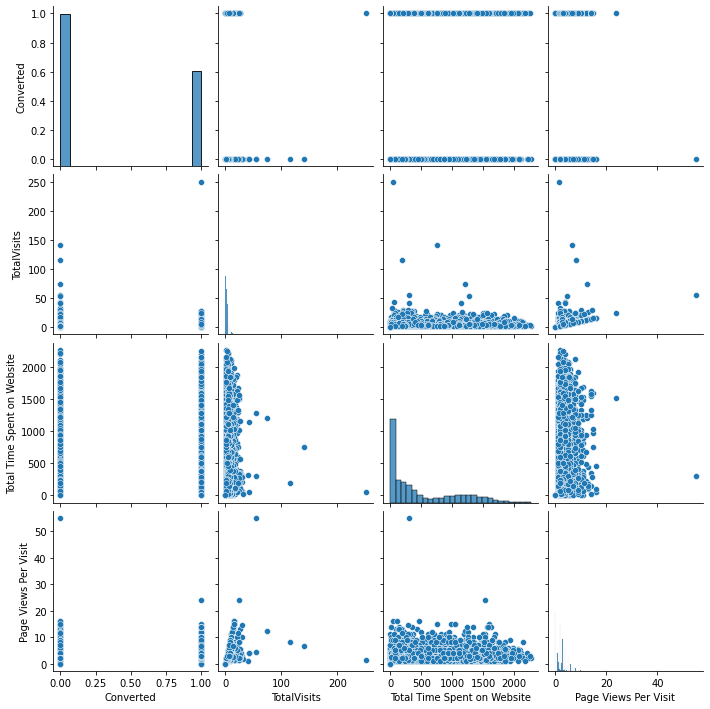

In [11]:
# Visualizing numeric data
num_var = leads1[['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]
num_var.head()

sns.pairplot(num_var)
plt.show()

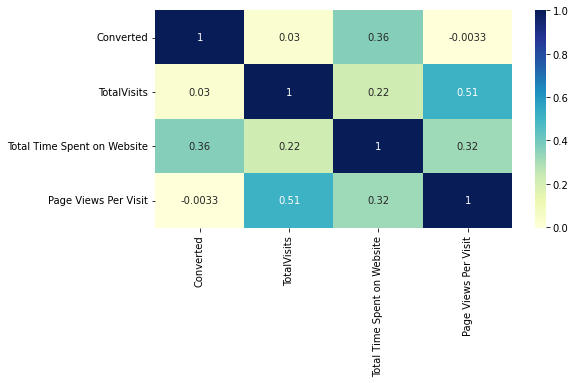

In [12]:
plt.figure(figsize = (8,4))
sns.heatmap(num_var.corr(),annot=True,cmap='YlGnBu')
plt.show()

**From the above, the variable 'Time Spent on Website' has positive correlation with the target variable 'Converted'.**

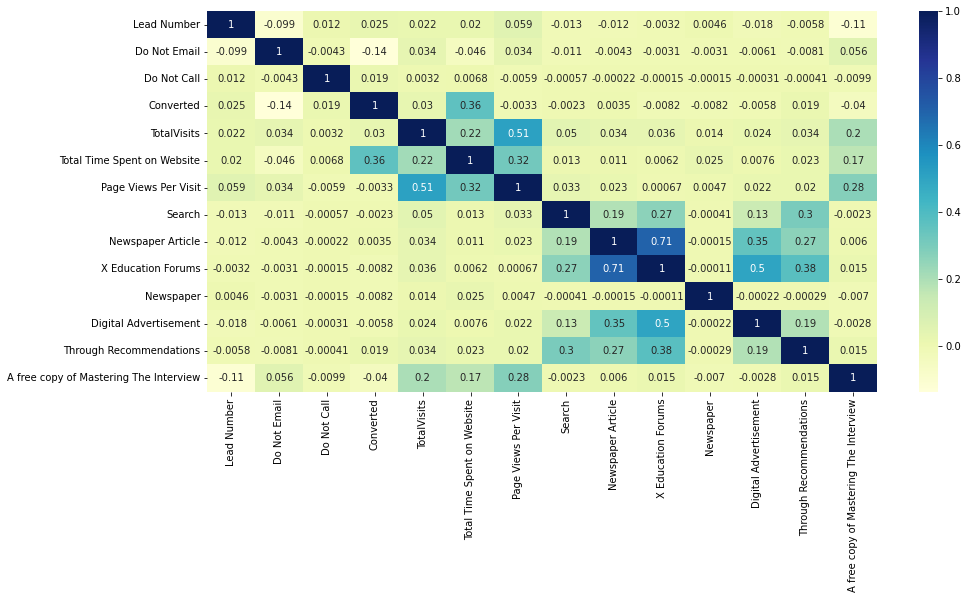

In [40]:
plt.figure(figsize = (15,7))
sns.heatmap(leads2.corr(),annot=True,cmap='YlGnBu')
plt.show()

In [61]:
# Dropping some more columns

# dropping columns that have value 'No'

leads2 = leads1.drop(labels = ['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis = 1)

In [42]:
leads2.shape

(9240, 26)

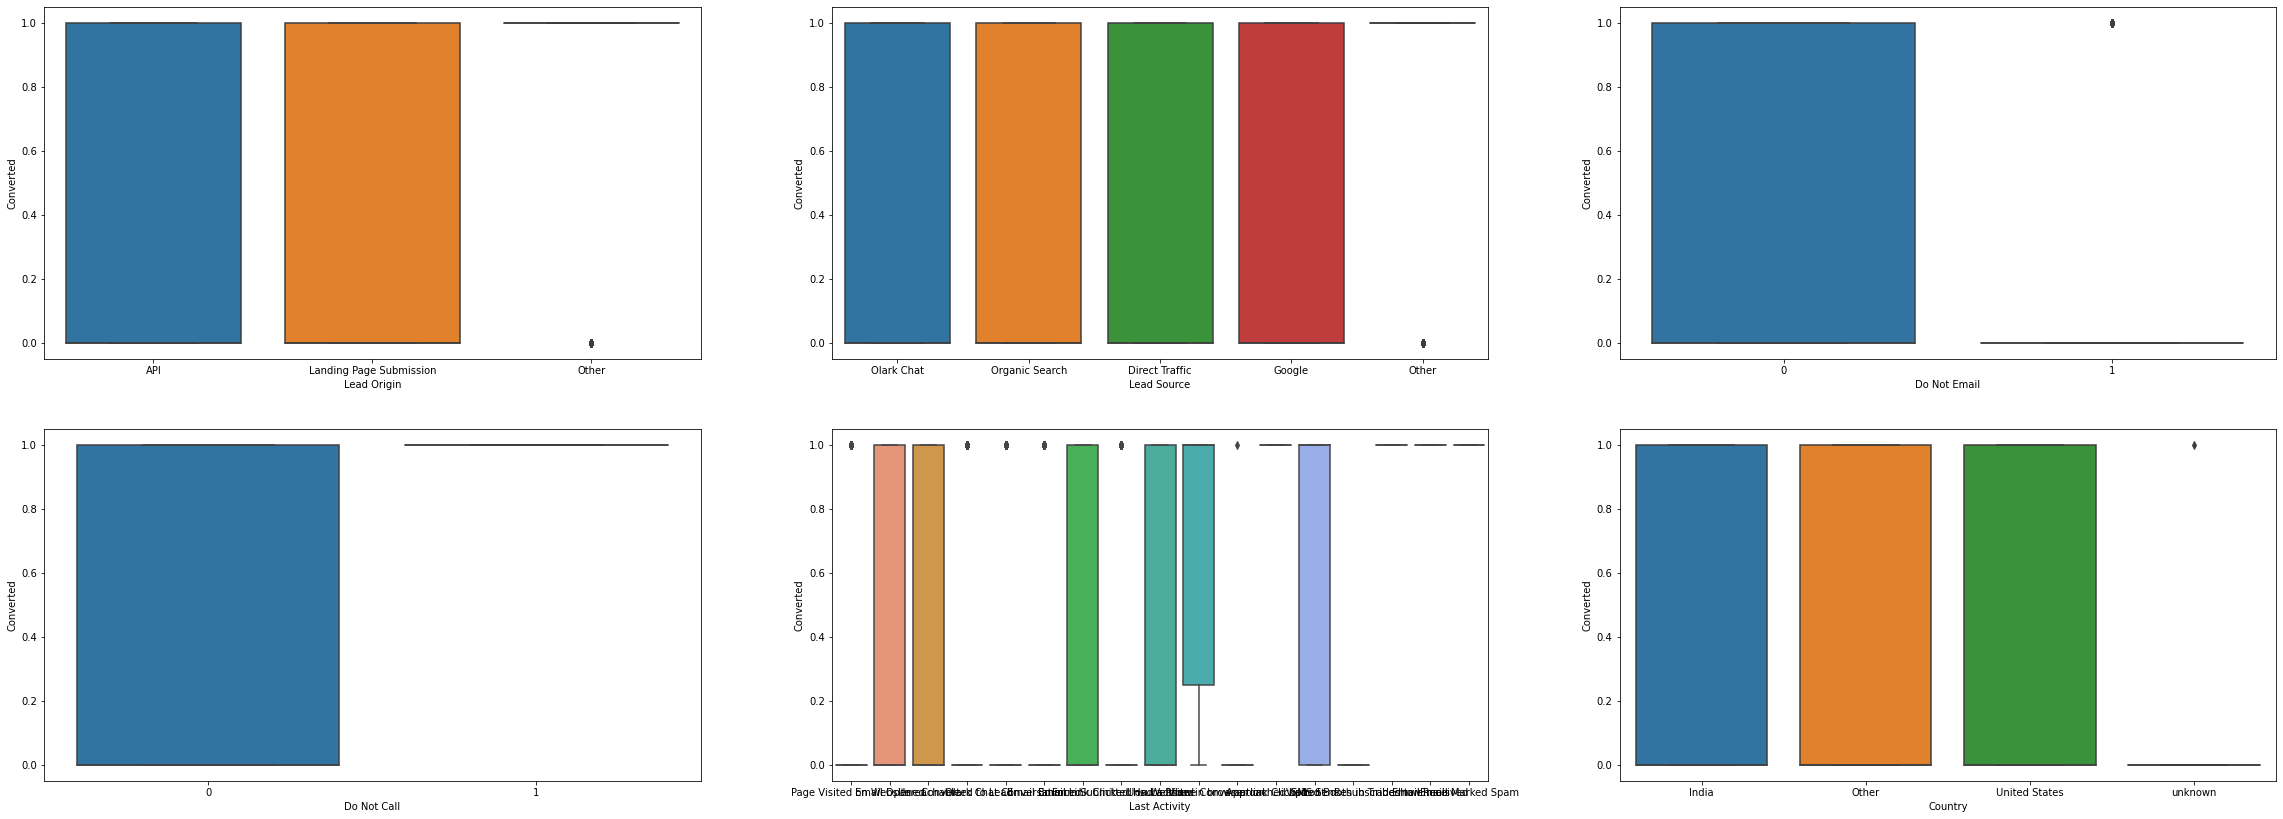

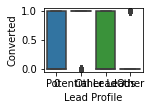

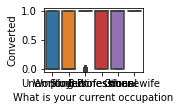

In [43]:
# Visualizing categorical variables

plt.figure(figsize = (40,22))
plt.subplot(3,3,1)
sns.boxplot(x='Lead Origin', y='Converted', data=leads1)

plt.subplot(3,3,2)
sns.boxplot(x='Lead Source', y='Converted', data=leads1)

plt.subplot(3,3,3)
sns.boxplot(x='Do Not Email', y='Converted', data=leads1)

plt.subplot(3,3,4)
sns.boxplot(x='Do Not Call', y='Converted', data=leads1)

plt.subplot(3,3,5)
sns.boxplot(x='Last Activity', y='Converted', data=leads1)

plt.subplot(3,3,6)
sns.boxplot(x='Country', y='Converted', data=leads1)
plt.show()

plt.subplot(3,3,7)
sns.boxplot(x='Lead Profile', y='Converted', data=leads1)
plt.show()

plt.subplot(3,3,8)
sns.boxplot(x='What is your current occupation', y='Converted', data=leads1)
plt.show()



In [ ]:
# Data Preparation

In [44]:
# Converting binary vaariables to Yes/ No (1, 0)
bi_var = ['Do Not Email', 'Do Not Call', 'Receive More Updates About Our Courses', 'Search', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque','A free copy of Mastering The Interview', 'Magazine',
          'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations']

# Defining map_function
def binary_map(x):
      return x.map({'Yes': 1, 'No':0})

# Applying map_function:
leads1[bi_var] = leads[bi_var].apply(binary_map)

leads1[bi_var].head()

,Do Not Email,Do Not Call,Receive More Updates About Our Courses,Search,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [46]:
# Rationalizing the multiple levels in categorical variables
leads1['Specialization'].value_counts(normalize=True)

Other                        0.409895
0                            0.248911
Finance Management           0.125096
Human Resource Management    0.108690
Marketing Management         0.107408
Name: Specialization, dtype: float64

In [48]:
#df['Education'].replace(['Under-Graduate', 'Diploma '], 
                        #[0, 1], inplace=True)


leads1['Lead Origin'].replace(['Lead Add Form', 'Lead Import', 'Quick Add Form'],
                              ['Other', 'Other', 'Other'], inplace=True)



In [49]:
leads1['Lead Source'].replace(['Reference','Welingak Website', 'Referral Sites', 'Facebook', 'bing', 'google', 'Click2call', 'Press_Release', 'Social Media','Live Chat', 'youtubechannel', 'testone', 'Pay per Click Ads', 
                     'welearnblog_Home', 'WeLearn', 'blog', 'NC_EDM'],
                              ['Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other'], inplace=True)




In [21]:
cat_var1 = leads1[['Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 
                  'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
                  'Digital Advertisement', 'Through Recommendations','Tags', 'Lead Profile', 'City', 'Last Notable Activity']]

In [22]:
cat_var1.value_counts(normalize=True)

Last Activity               Country  Specialization        What is your current occupation  What matters most to you in choosing a course  Search  Magazine  Newspaper Article  X Education Forums  Newspaper  Digital Advertisement  Through Recommendations  Tags                                 Lead Profile    City                Last Notable Activity
Email Opened                India    Select                Unemployed                       Better Career Prospects                        0       0         0                  0                   0          0                      0                        Ringing                              Select          Select              Email Opened             0.013671
SMS Sent                    India    Select                Unemployed                       Better Career Prospects                        0       0         0                  0                   0          0                      0                        Will revert after reading the ema

In [ ]:
# To convert 'Select' in columns to Null or NaN; in case more classes of fewer values are present, to convert these to 'Other'

In [ ]:
# Then do EDA, create dummy variables, transform variables, etc

In [ ]:
# to count the occurence of a value in a column
#data['column_name'].value_counts()[value]

In [23]:
leads1['Search'].value_counts(normalize=True)

0    0.998485
1    0.001515
Name: Search, dtype: float64

In [23]:
leads1['Country'].replace(['United Arab Emirates', 'Singapore', 'Saudi Arabia', 'United Kingdom', 'Australia', 'Qatar', 'Hong Kong', 'Bahrain', 'Oman',
                'France', 'South Africa', 'Nigeria', 'Germany', 'Kuwait', 'Canada', 'Sweden', 'China', 'Asia/Pacific Region',
                'Uganda', 'Bangladesh', 'Italy', 'Belgium', 'Netherlands', 'Ghana', 'Philippines', 'Russia',
                'Switzerland', 'Vietnam', 'Denmark', 'Tanzania', 'Liberia', 'Malaysia', 'Kenya', 'Sri Lanka', 'Indonesia'],
                              ['Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other'], inplace=True)

In [24]:
leads1['Specialization'].replace(['Operations Management', 'Business Administration', 'IT Projects Management', 'Supply Chain Management', 'Banking, Investment And Insurance', 'Travel and Tourism', 'Media and Advertising', 
                               'International Business', 'Healthcare Management', 'Hospitality Management', 'E-COMMERCE', 'Retail Management', 
                               'Rural and Agribusiness', 'E-Business', 'Services Excellence'],
                              ['Other', 'Other', 'Other','Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other'], inplace=True)



In [ ]:
# to count the occurence of a value in a column
#data['column_name'].value_counts()[value]

In [25]:
# to replace Select w/ '0'
#df.replace({'>20':27.5, '<5':2.5, '<1':0.5, '>10':22.5})

leads1.Specialization= leads1.Specialization.replace('Select', 0)

In [ ]:
leads1['How did you hear about X Education'].value_counts()

In [ ]:
leads2.head()

In [ ]:
leads1['How did you hear about X Education'].replace(['Advertisements', 'Social Media', 'Email', 'SMS'],
                              ['Other', 'Other', 'Other', 'Other'], inplace=True)

In [ ]:
# since 70% of data in 'How did you hear about X Education' is Select, which is equivalent to null, this column can be dropped

In [52]:
leads1['Tags'].replace(['Interested in other courses', 'Already a student', 'Closed by Horizzon', 'switched off', 'Busy', 'Lost to EINS', 'Not doing further education', 'Interested  in full time MBA', 'Graduation in progress', 
'invalid number', 'Diploma holder (Not Eligible)', 'wrong number given', 'opp hangup', 'number not provided', 'in touch with EINS',
'Lost to Others', 'Still Thinking', 'Want to take admission but has financial problems', 'In confusion whether part time or DLP',
'Interested in Next batch', 'Lateral student', 'Shall take in the next coming month', 'University not recognized', 'Recognition issue (DEC approval)'],
                              ['Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other','Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other' ], inplace=True)

In [53]:
leads1['Last Notable Activity'].value_counts(normalize=True)

Modified        0.368723
Email Opened    0.305952
SMS Sent        0.235065
Other           0.090260
Name: Last Notable Activity, dtype: float64

In [54]:
leads1['Lead Profile'].replace(['Student of SomeSchool', 'Lateral Student', 'Dual Specialization Student'], ['Other', 'Other', 'Other'], inplace=True)

In [55]:
leads1['Lead Profile'] = leads1['Lead Profile'].replace('Select', 0)

In [56]:
leads1['City'].replace(['Other Cities', 'Other Cities of Maharashtra', 'Other Metro Cities', 'Tier II Cities'], ['Other', 'Other', 'Other', 'Other'], inplace=True)

In [57]:
leads1['Last Notable Activity'].replace(['Page Visited on Website', 'Olark Chat Conversation', 'Email Link Clicked', 'Email Bounced','Unsubscribed', 'Unreachable',
'Had a Phone Conversation', 'Email Marked Spam', 'Approached upfront', 'Resubscribed to emails','View in browser link Clicked',
'Form Submitted on Website', 'Email Received'],
                              ['Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other'], inplace=True)


In [58]:
leads1['Receive More Updates About Our Courses'].value_counts()

0    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [62]:
# Creating dummy variable for some of the categorical variables:

dummy1 = pd.get_dummies(leads2[['Lead Origin', 'Lead Source', 'Last Activity', 'Country']], drop_first = True)

#Adding this to the dataframe leads2
leads2 = pd.concat([leads2, dummy1], axis=1)

#Dropping the original categorical var.
leads2 = leads2.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Country'], axis=1)

leads2.shape

(9240, 47)

In [63]:
# creating some more dummy variables

In [87]:
lna = pd.get_dummies(leads2['Last Notable Activity'],drop_first = True)

#Adding this to the dataframe leads2
leads2 = pd.concat([leads2, lna], axis=1)

#Dropping the original categorical var.
leads2 = leads2.drop(['Last Notable Activity'], axis=1)

leads2.shape

(9240, 62)

In [64]:
dummy2 = pd.get_dummies(leads2[['What is your current occupation', 'What matters most to you in choosing a course','Specialization','Tags']], drop_first = True)

In [65]:
# Adding this to dataframe
leads2 = pd.concat([leads2, dummy2], axis=1)

# Dropping original categorical var.
leads2 = leads2.drop(['What is your current occupation', 'What matters most to you in choosing a course','Specialization','Tags'], axis=1)

leads2.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,...,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Other,Tags_Ringing,Tags_Will revert after reading the email
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,0,0,...,1,0,0,0,0,0,0,0,1,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.0,0,0,...,1,0,0,0,0,0,0,1,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.0,1428,1.0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [66]:
# creating some more dummy var.:
lp = pd.get_dummies(leads2['Lead Profile'],drop_first = True)

In [67]:
# Adding this to dataframe
leads2 = pd.concat([leads2, lp], axis=1)

# Dropping original categorical var.
leads2 = leads2.drop(['Lead Profile'], axis=1)

leads2.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,...,What matters most to you in choosing a course_Other,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Other,Tags_Ringing,Tags_Will revert after reading the email,Other,Other Leads,Potential Lead
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,0,0,...,0,0,0,0,0,1,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,0,0,...,0,0,0,0,1,0,1,0,0,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.0,1428,1.0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [68]:
# creating some more dummy var.:
cty = pd.get_dummies(leads2['City'],drop_first = True)

In [69]:
# Adding this to dataframe
leads2 = pd.concat([leads2, cty], axis=1)

# Dropping original categorical var.
leads2 = leads2.drop(['City'], axis=1)

leads2.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,...,Specialization_Marketing Management,Specialization_Other,Tags_Ringing,Tags_Will revert after reading the email,Other,Other Leads,Potential Lead,Other,Select,Thane & Outskirts
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,0,0,...,0,0,1,0,0,0,0,0,1,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,0,0,...,0,1,0,1,0,0,1,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.0,0,0,...,0,1,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.0,1428,1.0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [89]:
leads2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 62 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Prospect ID                                                              9240 non-null   object 
 1   Lead Number                                                              9240 non-null   int64  
 2   Do Not Email                                                             9240 non-null   int64  
 3   Do Not Call                                                              9240 non-null   int64  
 4   Converted                                                                9240 non-null   int64  
 5   TotalVisits                                                              9240 non-null   float64
 6   Total Time Spent on Website                                             

In [71]:
leads2 = leads2.fillna(0)

In [72]:
# Data transformation
leads2.Converted.value_counts(normalize=True)

0    0.61461
1    0.38539
Name: Converted, dtype: float64

In [ ]:
# to count the occurence of a value in a column
#data['column_name'].value_counts()[value]


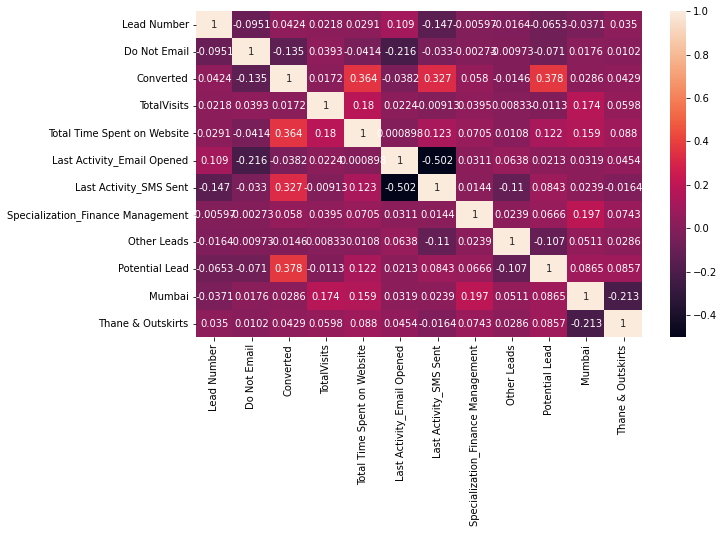

In [188]:
# To look at the heatmap for correlations:
plt.figure(figsize =(10,6))
sns.heatmap(X_train.corr(), annot=True, fmt='.3g')
plt.show()


In [ ]:
# To run first training model

In [90]:
#Test-Train Split

In [73]:
from sklearn.model_selection import train_test_split

In [91]:
# Putting feature variable to X
X = leads2.drop(['Converted','Prospect ID'], axis=1)

X.head()

,Lead Number,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,Tags_Will revert after reading the email,Other,Other Leads,Potential Lead,Other,Select,Thane & Outskirts,Modified,Other,SMS Sent
0,660737,0,0,0.0,0,0.0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,660728,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,660727,0,0,2.0,1532,2.0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
3,660719,0,0,1.0,305,1.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,660681,0,0,2.0,1428,1.0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [92]:
# Putting response variable to y
y = leads2['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [93]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [ ]:
#Feature Scaling

In [94]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Lead Number,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,Tags_Will revert after reading the email,Other,Other Leads,Potential Lead,Other,Select,Thane & Outskirts,Modified,Other,SMS Sent
1871,641410,0,0,-0.645678,-0.885371,-1.062143,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6795,597687,0,0,0.109111,0.005716,-0.452487,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3516,626825,0,0,0.297808,-0.691418,0.083827,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8105,587928,0,0,0.297808,1.365219,1.229797,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3934,622366,0,0,-0.645678,-0.885371,-1.062143,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [95]:
leads2 = leads2.replace('Select', 0)

In [96]:
leads2 = leads2.replace(np.nan,0)

In [86]:
leads2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 60 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Prospect ID                                                              9240 non-null   object 
 1   Lead Number                                                              9240 non-null   int64  
 2   Do Not Email                                                             9240 non-null   int64  
 3   Do Not Call                                                              9240 non-null   int64  
 4   Converted                                                                9240 non-null   int64  
 5   TotalVisits                                                              9240 non-null   float64
 6   Total Time Spent on Website                                             

In [81]:
leads2['Lead Origin_Landing Page Submission'].dtype


dtype('uint8')

In [97]:
import statsmodels.api as sm

In [98]:
# Logistic regression
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6407
Model Family:                Binomial   Df Model:                           60
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1679.0
Date:                Tue, 15 Mar 2022   Deviance:                       3357.9
Time:                        11:17:56   Pearson chi2:                 1.74e+04
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      -6.5070      1.386     -4.695      0.000      -9.224      -3.790
Lead Number                                                              5.313e-06   2.06e-06      2.583      0.010    1.28e-06    9.34e-06
Do Not Email                                                               -1.0867      0.269     -4.039      0.000      -1.614      -0.559
Do Not Call                                                                22.8231   4.47e+04      0.001      1.000   -8.76e+04    8.77e+04
TotalVisits                                                                 0.1955      0.057      3.446      0.001       0.084       0.307
Total Time Spent on Website                                                 1.0956      0.052     21.099      0.000       0.994       1.197
Page Views Per Visit                                                       -0.1306      0.071     -1.845      0.065      -0.269       0.008
Search                                                                      2.0870      0.991      2.105      0.035       0.144       4.030
Newspaper Article                                                          20.4888   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
X Education Forums                                                        -23.7792   1.23e+05     -0.000      1.000   -2.41e+05    2.41e+05
Newspaper                                                                 -22.0826   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Digital Advertisement                                                     -22.4498   5.01e+04     -0.000      1.000   -9.83e+04    9.82e+04
Through Recommendations                                                     2.1858      1.865      1.172      0.241      -1.469       5.841
A free copy of Mastering The Interview                                      0.0386      0.142      0.271      0.786      -0.240       0.317
Lead Origin_Landing Page Submission                                        -0.0885      0.188     -0.471      0.637      -0.457       0.279
Lead Origin_Other                                                           3.2485      0.375      8.666      0.000       2.514       3.983
Lead Source_Google                                                          0.2138      0.150      1.429      0.153      -0.080       0.507
Lead Source_Olark Chat                                                      1.1863      0.203      5.842      0.000       0.788       1.584
Lead Source_Organic Search                                                  0.0093      0.173      0.054      0.957      -0.330       0.348
Lea

In [ ]:
# From the above, important features are:
#TotalVisits, Total Time Spent on Website, Last Activity_Email Opened, Last Activity_SMS Sent, Specialization_Finance Management, Other Leads,
# Potential Lead,
#, Mumbai, Thane & Outskirts, Search, Lead Origin_Other, Lead Source_Olark Chat, Tags_Ringing, Tags_Will revert after reading the email, SMS Sent

In [ ]:
#Model re-building

In [99]:
# Putting feature variable to X
X = leads2.drop(['Prospect ID','Do Not Call', 'Page Views Per Visit', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview', 'Lead Origin_Landing Page Submission',
'Lead Source_Google', 'Lead Source_Organic Search', 'Lead Source_Other', 
'Last Activity_Converted to Lead', 'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam', 'Last Activity_Email Received',
'Last Activity_Form Submitted on Website', 'Last Activity_Had a Phone Conversation', 'Last Activity_Olark Chat Conversation',
'Last Activity_Page Visited on Website', 'Last Activity_Resubscribed to emails', 
'Last Activity_Unreachable', 'Last Activity_Unsubscribed', 'Last Activity_View in browser link Clicked',
'Last Activity_Visited Booth in Tradeshow', 'Country_Other',
'Country_United States', 'Country_unknown', 'Modified', 'Other','What is your current occupation_Housewife',
'What is your current occupation_Other', 'What is your current occupation_Student',
'What is your current occupation_Unemployed', 'What is your current occupation_Working Professional', 
'What matters most to you in choosing a course_Flexibility & Convenience', 
'What matters most to you in choosing a course_Other','Specialization_Human Resource Management',	'Specialization_Marketing Management',
'Specialization_Other', 'Other', 'Other', 'Converted'], axis=1)

X.head(3)
X.shape

(9240, 17)

In [100]:
# Putting response variable to y
y = leads2['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [111]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [106]:
#Feature Scaling

In [112]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[['TotalVisits', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website']])

X_train.head()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6468 entries, 1871 to 5640
Data columns (total 17 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Number                               6468 non-null   int64  
 1   Do Not Email                              6468 non-null   int64  
 2   TotalVisits                               6468 non-null   float64
 3   Total Time Spent on Website               6468 non-null   float64
 4   Search                                    6468 non-null   int64  
 5   Lead Origin_Other                         6468 non-null   uint8  
 6   Lead Source_Olark Chat                    6468 non-null   uint8  
 7   Last Activity_Email Opened                6468 non-null   uint8  
 8   Last Activity_SMS Sent                    6468 non-null   uint8  
 9   Specialization_Finance Management         6468 non-null   uint8  
 10  Tags_Ringing                     

In [107]:
# Logistic regression
logm2 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm2.fit()
res.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1748.8
Date:                Tue, 15 Mar 2022   Deviance:                       3497.6
Time:                        11:32:09   Pearson chi2:                 1.27e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -7.2211      1.222     -5.909      0.000      -9.616      -4.826
Lead Number                               5.039e-06   1.94e-06      2.592      0.010    1.23e-06    8.85e-06
Do Not Email                                -1.0201      0.214     -4.757      0.000      -1.440      -0.600
TotalVisits                                  0.0411      0.010      4.313      0.000       0.022       0.060
Total Time Spent on Website                  0.0020   9.21e-05     21.958      0.000       0.002       0.002
Search                                       1.4817      0.929      1.596      0.111      -0.338       3.302
Lead Origin_Other                            3.4850      0.198     17.571      0.000       3.096       3.874
Lead Source_Olark Chat                       1.0725      0.135      7.964      0.000       0.809       1.336
Last Activity_Email Opened                   0.9532      0.111      8.577      0.000       0.735       1.171
Last Activity_SMS Sent                       1.2139      0.178      6.817      0.000       0.865       1.563
Specialization_Finance Management            0.4882      0.148      3.293      0.001       0.198       0.779
Tags_Ringing                                -3.6798      0.237    -15.547      0.000      -4.144      -3.216
Tags_Will revert after reading the email     3.9429      0.176     22.465      0.000       3.599       4.287
Other Leads                                 -0.0683      0.200     -0.342      0.732      -0.460       0.323
Potential Lead                               1.1396      0.138      8.275      0.000       0.870       1.410
Select                                       0.9609      0.109      8.822      0.000       0.747       1.174
Thane & Outskirts                           -0.0432      0.173     -0.250      0.803      -0.382       0.296
SMS Sent                                     1.6100      0.183      8.805      0.000       1.252       1.968
============================================================================================================
"""

In [113]:
# Feature Elimination using RFE
from sklearn.linear_model import LogisticRegression

In [114]:
logreg = LogisticRegression()

In [116]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, step=15)
rfe = rfe.fit(X_train, y_train)

In [117]:
rfe.support_

array([ True, False, False,  True, False,  True, False, False,  True,
       False,  True,  True, False,  True, False, False,  True])

In [118]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Number', True, 1),
 ('Do Not Email', False, 2),
 ('TotalVisits', False, 2),
 ('Total Time Spent on Website', True, 1),
 ('Search', False, 2),
 ('Lead Origin_Other', True, 1),
 ('Lead Source_Olark Chat', False, 2),
 ('Last Activity_Email Opened', False, 2),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Finance Management', False, 2),
 ('Tags_Ringing', True, 1),
 ('Tags_Will revert after reading the email', True, 1),
 ('Other Leads', False, 2),
 ('Potential Lead', True, 1),
 ('Select', False, 2),
 ('Thane & Outskirts', False, 2),
 ('SMS Sent', True, 1)]

In [119]:
col = X_train.columns[rfe.support_]

In [120]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Search', 'Lead Source_Olark Chat',
       'Last Activity_Email Opened', 'Specialization_Finance Management',
       'Other Leads', 'Select', 'Thane & Outskirts'],
      dtype='object')

In [ ]:
# Assessing the model with StatsModels:

In [124]:
X_train_sm = sm.add_constant(X_train[col])

logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())

res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6459
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1904.5
Date:                Tue, 15 Mar 2022   Deviance:                       3808.9
Time:                        12:01:15   Pearson chi2:                 1.02e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -5.4141      1.140     -4.747      0.000      -7.649      -3.179
Lead Number                               5.675e-06   1.83e-06      3.094      0.002    2.08e-06    9.27e-06
Total Time Spent on Website                  0.8986      0.042     21.437      0.000       0.816       0.981
Lead Origin_Other                            3.2908      0.179     18.417      0.000       2.941       3.641
Last Activity_SMS Sent                       0.4596      0.153      3.013      0.003       0.161       0.759
Tags_Ringing                                -3.4958      0.233    -15.028      0.000      -3.952      -3.040
Tags_Will revert after reading the email     3.8650      0.168     23.069      0.000       3.537       4.193
Potential Lead                               1.0242      0.132      7.785      0.000       0.766       1.282
SMS Sent                                     1.7195      0.172      9.968      0.000       1.381       2.058
============================================================================================================
"""

In [127]:
# Getting predicted values on the trained set:
y_train_pred = res.predict(X_train_sm)*100
y_train_pred[:10]

1871     0.231647
6795    11.743037
3516     0.253792
8105    10.272028
3934     6.430196
4844    99.889890
3297     0.247474
8071    88.113278
987     23.448981
7423    99.887809
dtype: float64

In [ ]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

In [ ]:
# Creating a dataframe with Lead Number and Predicted values

In [ ]:
#y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
#y_train_pred_final['CustID'] = y_train.index
#y_train_pred_final.head()

In [161]:
y_train_pred_final = pd.DataFrame({'Lead':y_train.values, 'Conversion_Prob':y_train_pred/100})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Lead,Conversion_Prob,Lead Number
0,0,0.231647,1871
1,0,11.743037,6795
2,0,0.253792,3516
3,0,10.272028,8105
4,0,6.430196,3934


In [135]:
#Checking VIFs
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [136]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Last Activity_SMS Sent,5.24
7,SMS Sent,4.96
5,Tags_Will revert after reading the email,1.97
0,Lead Number,1.88
6,Potential Lead,1.60
2,Lead Origin_Other,1.23
4,Tags_Ringing,1.23
1,Total Time Spent on Website,1.12


**From the above, VIF values are within permissible range.**

In [ ]:
# All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only.

In [138]:
# Making predictions on the test set:
X_test[['TotalVisits', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website']])

In [139]:
X_test = X_test[col]
X_test.head()

,Lead Number,Total Time Spent on Website,Lead Origin_Other,Last Activity_SMS Sent,Tags_Ringing,Tags_Will revert after reading the email,Potential Lead,SMS Sent
4269,619003,0.964504,0,1,0,0,0,1
2376,636884,-0.885371,1,1,0,1,0,1
7766,590281,-0.777416,0,0,0,1,0,0
9199,579892,-0.885371,0,0,0,0,1,0
4359,617929,-0.885371,1,0,0,1,1,0


In [140]:
X_test_sm = sm.add_constant(X_test)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [141]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

4269    0.758535
2376    0.998818
7766    0.750671
9199    0.130723
4359    0.995836
9186    0.994270
1631    0.981940
8963    0.918412
8007    0.090758
5324    0.972175
dtype: float64

In [142]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
4269,0.758535
2376,0.998818
7766,0.750671
9199,0.130723
4359,0.995836


In [143]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [144]:
# Putting Lead Number to index
y_test_df['Lead Number'] = y_test_df.index

In [145]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
Let's check the overall accuracy.
from sklearn import metrics
metrics.accuracy_score(y_pred_1.Lead, y_pred_1_predicted)

In [ ]:
#Plotting the ROC Curve

In [151]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
#fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_1.Lead, y_train_pred_1.Conversion_Prob, drop_intermediate = False )

In [ ]:
y_train_pred_final = pd.DataFrame({'Lead':y_train.values, 'Conversion_Prob':y_train_pred/100})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

In [ ]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()